#Problem Statement 
During the last few decades, with the rise of Youtube, Amazon, Netflix, and many other such
web services, recommender systems have taken more and more place in our lives. From
e-commerce (suggest to buyers articles that could interest them) to online advertisement
(suggest to users the right contents, matching their preferences), recommender systems are
today unavoidable in our daily online journeys.
In a very general way, recommender systems are algorithms aimed at suggesting relevant
items to users (items being movies to watch, text to read, products to buy, or anything else
depending on industries).
Recommender systems are really critical in some industries as they can generate a huge
amount of income when they are efficient or also be a way to stand out significantly from
competitors.

#The main objective is to create a book recommendation system for users.

The Book-Crossing dataset comprises 3 files.

● Users :

Contains the users. Note that user IDs (User-ID) have been anonymized and map to
integers. Demographic data is provided (Location, Age) if available. Otherwise, these
fields contain NULL values.

● Books :

Books are identified by their respective ISBN. Invalid ISBNs have already been removed
from the dataset. Moreover, some content-based information is given (Book-Title,
Book-Author, Year-Of-Publication, Publisher), obtained from Amazon Web
Services. Note that in the case of several authors, only the first is provided. URLs linking
to cover images are also given, appearing in three different flavors (Image-URL-S,
Image-URL-M, Image-URL-L), i.e., small, medium, large. These URLs point to the
Amazon website.

● Ratings :

Contains the book rating information. Ratings (Book-Rating) are either explicit,
expressed on a scale from 1-10 (higher values denoting higher appreciation), or implicit,
expressed by 0.

## **Importing Libraries**

In [1]:
#Importing modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

#ignore warnings
import warnings
warnings.filterwarnings('ignore')


## **Loading all Dataset**

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

In [5]:
#loading user.csv data as users_df
users_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Project/Book_Recommendation_System_Rajesh_Kumar_Patel-Capstone_Project_4/Data/Users.csv')

In [6]:
#first look of users_df
users_df.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [7]:
#loading Books.csv data as books_df
books_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Project/Book_Recommendation_System_Rajesh_Kumar_Patel-Capstone_Project_4/Data/Books.csv')

In [8]:
#first look of books_df
books_df.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [9]:
#loading Ratings.csv data as ratings_df
ratings_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Project/Book_Recommendation_System_Rajesh_Kumar_Patel-Capstone_Project_4/Data/Ratings.csv')

In [10]:
#first look of ratings_df
ratings_df.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


# **Exploratory Data Analysis**

In [11]:
#shape of all three dataset
print(f''' \t  shape of users_df is:   {users_df.shape}
          shape of books_df is:   {books_df.shape}
          shape of ratings_df is: {ratings_df.shape}''')

 	  shape of users_df is:   (278858, 3)
          shape of books_df is:   (271360, 8)
          shape of ratings_df is: (1149780, 3)


## **Feature information in details**

**Dataset 1 - Users.csv (278858)**

* **User-ID** Unique user id
* **Location** location of the user
* **Age** age of user


**Dataset 2 - Books.csv (271360)**
* **ISBN** Book ID
* **Book-Title** Book Name
* **Book-Author** Book Author Name
* **Year-Of-Publication** year of publication date
* **Publisher** publisher of the book
* **Image-URL-S** small image of the book , amazon link
* **Image-URL-M** medium size image of the book , amazon link
* **Image-URL-L** large image size of the book , amazon link

**Dataset 3 - Rating.csv (1149780)**
* **User-ID** Unique user id
* **ISBN** Book ID
* **Book-Rating** Rating given by user

## **1.)Users_Dataset**

In [12]:
#function for checking missing value
def check_missing_values(df):
    mis_val = df.isnull().sum()
    mis_val_percent = round(df.isnull().mean().mul(100),2)
    mis_table = pd.concat([mis_val,mis_val_percent],axis=1)
    mis_table = mis_table.rename(columns = {0:'Missing Values',1:'Missing Values %'})
    mis_table['Data_type']=df.dtypes
    mis_table = mis_table.sort_values('Missing Values %',ascending=False)
    return mis_table.reset_index()

In [13]:
#checking missing value in Users dataset
check_missing_values(users_df)

,index,Missing Values,Missing Values %,Data_type
0,Age,110762,39.72,float64
1,User-ID,0,0.00,int64
2,Location,0,0.00,object


Age column have 39.7% of missing value

In [14]:
#how many unique value present in location
users_df['Location'].nunique()

57339

In [15]:
users_df['Location']

0                         nyc, new york, usa
1                  stockton, california, usa
2            moscow, yukon territory, russia
3                  porto, v.n.gaia, portugal
4         farnborough, hants, united kingdom
                         ...                
278853                 portland, oregon, usa
278854    tacoma, washington, united kingdom
278855             brampton, ontario, canada
278856             knoxville, tennessee, usa
278857                  dublin, n/a, ireland
Name: Location, Length: 278858, dtype: object

In [16]:
#what's unique value present in location
users_df['Location'].unique()

array(['nyc, new york, usa', 'stockton, california, usa',
       'moscow, yukon territory, russia', ...,
       'sergnano, lombardia, italy', 'stranraer, n/a, united kingdom',
       'tacoma, washington, united kingdom'], dtype=object)

### **Feature Engineering**

In [17]:
#extract country name from location column
for i in users_df:
    users_df['Country'] = users_df['Location'].str.extract(r'\,+\s?(\w*\s?\w*)\"*$')   

In [18]:
#how many unique value present in Country column
users_df['Country'].nunique()

529

In [19]:
#drop location column
users_df = users_df.drop('Location',axis=1)

In [20]:
#checking missing value after extracting country name
check_missing_values(users_df)

,index,Missing Values,Missing Values %,Data_type
0,Age,110762,39.72,float64
1,Country,368,0.13,object
2,User-ID,0,0.00,int64


In [21]:
#changing datatype of country column as string
users_df['Country'] = users_df['Country'].astype('str')

In [22]:
#exploring all country name
a=list(users_df['Country'].unique())
a=set(a)
a=list(a)
a = [x for x in a if x is not None]
a.sort()
print(a)

['', '01776', '02458', '19104', '23232', '30064', '85021', '87510', '_ brasil', 'a', 'aaa', 'adsgfdr', 'afghanistan', 'ahrensburg', 'alachua', 'albania', 'alderney', 'algeria', 'algérie', 'allen', 'ama lurra', 'america', 'american samoa', 'andorra', 'angola', 'antarctica', 'aotearoa', 'argentina', 'armenia', 'aroostook', 'aruba', 'asturies', 'auckland', 'austbritania', 'australia', 'australii', 'austria', 'autralia', 'az', 'azerbaijan', 'bademn würtemberg', 'bahamas', 'bahrain', 'baltimore', 'bangladesh', 'barbados', 'basilicata', 'basque country', 'bavaria', 'baxter', 'bbbzzzzz', 'belarus', 'belgi', 'belgique', 'belgium', 'belize', 'bell', 'benin', 'berguedà', 'bermuda', 'bernalillo', 'bfe', 'bhutan', 'bih', 'bkk', 'bladen', 'bolivia', 'bosnia', 'botswana', 'brasil', 'brazil', 'brunei', 'brunei darussalam', 'bucks', 'bulgaria', 'buncombe', 'burkina faso', 'burkinafasu', 'burlington', 'burma', 'butler', 'c', 'cadd0', 'calabria', 'california', 'cambodia', 'camden', 'cameroon', 'can', 'c

Some country name has Misspelled

In [23]:
#replacing country name with correct spelling
users_df['Country'].replace(['','01776','02458','19104','23232','30064','85021','87510','alachua','america','austria','autralia','cananda','geermany','italia','united kindgonm','united sates','united staes','united state','united states','us'],
                           ['other','usa','usa','usa','usa','usa','usa','usa','usa','usa','australia','australia','canada','germany','italy','united kingdom','usa','usa','usa','usa','usa'],inplace=True)

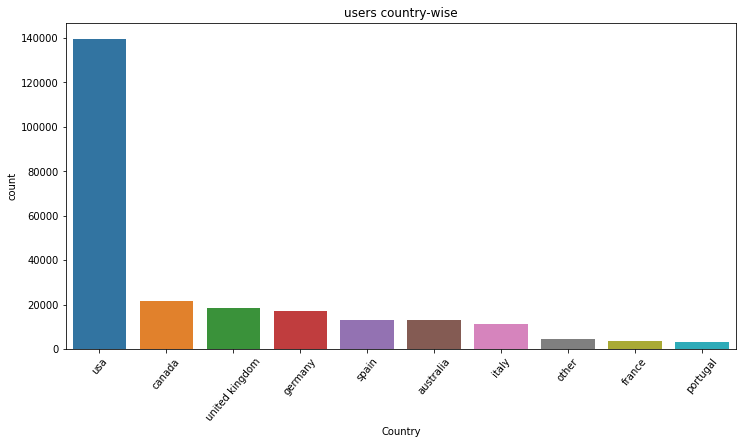

In [24]:
#Visualize top 10 count of users country-wise
plt.figure(figsize=(12,6))
sns.countplot('Country',data = users_df,order=users_df['Country'].value_counts().iloc[:10].index)
plt.title('users country-wise')
plt.xticks(rotation=50)
plt.show()

Most of the users belongs to the USA

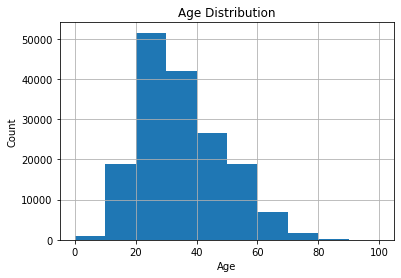

In [25]:
#Age column feature
users_df['Age'].hist(bins=[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

Most of user belongs to 20 to 30 years, then 30 to 40 years

### **Outliers detection**

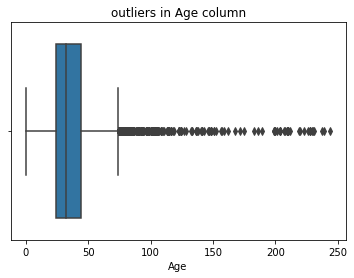

In [26]:
#checking outliers in Age column
sns.boxplot('Age', data = users_df)
plt.title('outliers in Age column')
plt.show()

In this datset have outliers we need to remove the outliers

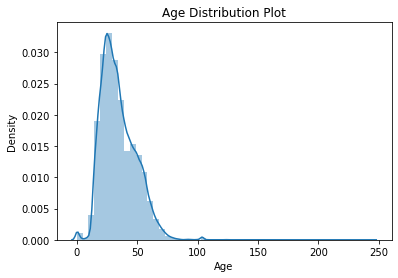

In [27]:
#Distribution plot of Age column
sns.distplot(users_df['Age'])
plt.title('Age Distribution Plot')
plt.show()

Age value's below 5 and above 100 do not make much sense for our book rating. hence remove these values

In [28]:
#outliers data replacing by NaN
users_df.loc[(users_df.Age > 100) | (users_df.Age < 5), 'Age'] = np.nan

In [29]:
#Checking Null Value after treated outliers
users_df.isna().sum()

User-ID         0
Age        112010
Country         0
dtype: int64

### **Null values treatment**

we fill NaN value in Age column by median with country-wise

In [30]:
#fill na with median country-wise
users_df['Age'] = users_df['Age'].fillna(users_df.groupby('Country')['Age'].transform('median'))

In [31]:
#Checking Null Value after fill null value
users_df.isna().sum()

User-ID      0
Age        276
Country      0
dtype: int64

still Age column have 276 NaN value, now fill NaN with mean value

In [32]:
#fill na with mean
users_df['Age'] = users_df['Age'].fillna(users_df.Age.mean())

In [33]:
#Checking Null Value
users_df.isna().sum()

User-ID    0
Age        0
Country    0
dtype: int64

## **2.)Books_Dataset**

In [34]:
#5 datapoints from books_df dataset
books_df.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


**Which Author have written more book**

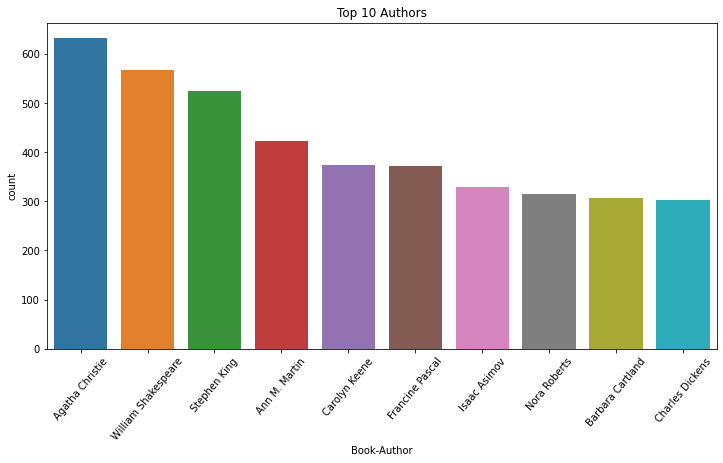

In [35]:
#Visualise top 10 Authors
plt.figure(figsize=(12,6))
sns.countplot('Book-Author',data = books_df,order = books_df['Book-Author'].value_counts().iloc[:10].index)
plt.title('Top 10 Authors')
plt.xticks(rotation=50)
plt.show()

Agatha Christie is the top Author

**Which Publisher have Published more book**

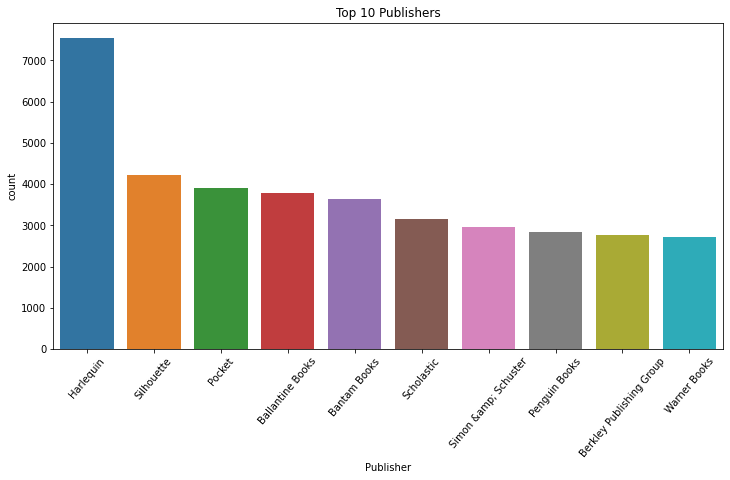

In [36]:
#Visualize Top 10 Publishers
plt.figure(figsize=(12,6))
sns.countplot('Publisher',data = books_df,order = books_df['Publisher'].value_counts().iloc[:10].index)
plt.title('Top 10 Publishers')
plt.xticks(rotation=50)
plt.show()

Harlequin is the top Publisher

In [37]:
#unique value of Publication year
books_df['Year-Of-Publication'] = books_df['Year-Of-Publication'].astype('str')
a = list(books_df['Year-Of-Publication'].unique())
a = set(a)
a = list(a)
a = [x for x in a if x is not None]
a.sort()
print(a)

['0', '1376', '1378', '1806', '1897', '1900', '1901', '1902', '1904', '1906', '1908', '1909', '1910', '1911', '1914', '1917', '1919', '1920', '1921', '1922', '1923', '1924', '1925', '1926', '1927', '1928', '1929', '1930', '1931', '1932', '1933', '1934', '1935', '1936', '1937', '1938', '1939', '1940', '1941', '1942', '1943', '1944', '1945', '1946', '1947', '1948', '1949', '1950', '1951', '1952', '1953', '1954', '1955', '1956', '1957', '1958', '1959', '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2008', '2010', '2011', '2012', '2020', '2021', '2024', '2026', '2030', '2037', '2038', '2050', 'DK Publishing Inc', 'Gallimard']


In [38]:
#checking the row having 'DK Publishing Inc' as Year-Of-Publication
books_df.loc[books_df['Year-Of-Publication'] == 'DK Publishing Inc',:]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,NaN
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,NaN


Year-Of-Publication data exchanged with Book-Author we need to correct the entry of data

In [39]:
#From above, it is seen that bookAuthor is incorrectly loaded with bookTitle, hence making required corrections
#ISBN '0789466953'
books_df.loc[books_df.ISBN == '0789466953','Year-Of-Publication'] = 2000
books_df.loc[books_df.ISBN == '0789466953','Book-Author'] = "James Buckley"
books_df.loc[books_df.ISBN == '0789466953','Publisher'] = "DK Publishing Inc"
books_df.loc[books_df.ISBN == '0789466953','Book-Title'] = "DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)"

#ISBN '078946697X'
books_df.loc[books_df.ISBN == '078946697X','Year-Of-Publication'] = 2000
books_df.loc[books_df.ISBN == '078946697X','Book-Author'] = "Michael Teitelbaum"
books_df.loc[books_df.ISBN == '078946697X','Publisher'] = "DK Publishing Inc"
books_df.loc[books_df.ISBN == '078946697X','Book-Title'] = "DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)"

#rechecking
books_df.loc[(books_df.ISBN == '0789466953') | (books_df.ISBN == '078946697X'),:]
#corrections done

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",Michael Teitelbaum,2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,NaN
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",James Buckley,2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,NaN


In [40]:
#checking the row having 'DK Publishing Inc' as Year-Of-Publication
books_df.loc[books_df['Year-Of-Publication'] == 'Gallimard',:]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,NaN


In [41]:
#making required corrections as above, keeping other fields intact
books_df.loc[books_df.ISBN == '2070426769','Year-Of-Publication'] = 2003
books_df.loc[books_df.ISBN == '2070426769','Book-Author'] = "Jean-Marie Gustave Le ClÃ?Â©zio"
books_df.loc[books_df.ISBN == '2070426769','Publisher'] = "Gallimard"
books_df.loc[books_df.ISBN == '2070426769','Book-Title'] = "Peuple du ciel, suivi de 'Les Bergers"


books_df.loc[books_df.ISBN == '2070426769',:]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers",Jean-Marie Gustave Le ClÃ?Â©zio,2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,NaN


In [42]:
#changing Year-Of-Publication datatypes as numeric
books_df['Year-Of-Publication']=pd.to_numeric(books_df['Year-Of-Publication'], errors='coerce')
print(sorted(books_df['Year-Of-Publication'].unique()))

[0, 1376, 1378, 1806, 1897, 1900, 1901, 1902, 1904, 1906, 1908, 1909, 1910, 1911, 1914, 1917, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2008, 2010, 2011, 2012, 2020, 2021, 2024, 2026, 2030, 2037, 2038, 2050]


In [43]:
#how many books Year-Of-Publication is greater than 2006
books_df[books_df['Year-Of-Publication'] > 2006].count()

ISBN                   23
Book-Title             23
Book-Author            23
Year-Of-Publication    23
Publisher              23
Image-URL-S            23
Image-URL-M            23
Image-URL-L            23
dtype: int64

In [44]:
#replacing greater than 2006 and equal to 0 with NaN value of Year-Of-Publication
books_df.loc[(books_df['Year-Of-Publication'] > 2006) | (books_df['Year-Of-Publication'] == 0),'Year-Of-Publication'] = np.nan

#replacing NaNs with median value of Year-Of-Publication
books_df['Year-Of-Publication'].fillna(round(books_df['Year-Of-Publication'].median()), inplace=True)

In [45]:
#dropping last three columns containing image URLs which will not be required for analysis
books_df = books_df.drop(['Image-URL-S', 'Image-URL-M', 'Image-URL-L'],axis=1)

In [46]:
#checking missing value
books_df.isna().sum()

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
dtype: int64

In [47]:
#exploring 'publisher' column
books_df.loc[books_df.Publisher.isnull(),:]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002.0,NaN
129037,1931696993,Finders Keepers,Linnea Sinclair,2001.0,NaN


In [48]:
#Filling Nan of Publisher with others
books_df.Publisher.fillna('other',inplace=True)

In [49]:
#exploring 'Book-Author' column
books_df.loc[books_df['Book-Author'].isnull(),:]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
187689,9627982032,The Credit Suisse Guide to Managing Your Perso...,NaN,1995.0,Edinburgh Financial Publishing


In [50]:
#Filling Nan of Book-Author with others
books_df['Book-Author'].fillna('other',inplace=True)

In [51]:
#checking missing value
books_df.isna().sum()

ISBN                   0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
dtype: int64

## **3.)Ratings_Dataset**

In [52]:
#first 5 datapoints from ratings_df dataset
ratings_df.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [53]:
#checking missing value
ratings_df.isna().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

ratings_df dataset should have books only which exist in our books_df dataset


In [54]:
#how many ratings match in our books_df ISBN number
ratings_df_new = ratings_df[ratings_df.ISBN.isin(books_df.ISBN)]
ratings_df.shape,ratings_df_new.shape

((1149780, 3), (1031136, 3))

It can be seen that many rows having book ISBN not part of our books_df dataset got dropped off

ratings_df dataset should have ratings from users which exist in users_df dataset

In [55]:
##how many users match in our users_df users
print("Shape of dataset before dropping",ratings_df_new.shape)
ratings_df_new = ratings_df_new[ratings_df_new['User-ID'].isin(users_df['User-ID'])]
print("shape of dataset after dropping",ratings_df_new.shape)

Shape of dataset before dropping (1031136, 3)
shape of dataset after dropping (1031136, 3)


It can be seen that no new user was there in ratings dataset

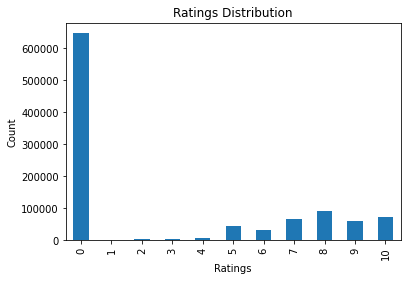

In [56]:
#visualize Rating column
ratings_df_new['Book-Rating'].value_counts(sort=False).plot(kind='bar')
plt.title('Ratings Distribution')
plt.xlabel('Ratings')
plt.ylabel('Count')
plt.show()

Most of the ratings are 0

The ratings are very unevenly distributed, and the vast majority of ratings are 0 .As quoted in the description of the dataset - BX-Book-Ratings contains the book rating information. Ratings are either explicit, expressed on a scale from 1-10 higher values denoting higher appreciation, or implicit, expressed by 0.Hence segragating implicit and explict ratings datasets

In [57]:
#seprating 0 and non 0 ratings from ratings_df_new datasets
ratings_non_zero = ratings_df_new[ratings_df_new['Book-Rating'] != 0]
ratings_zero = ratings_df_new[ratings_df_new['Book-Rating'] == 0]

In [58]:
#shape of zero and non_zero ratings dataset
print('ratings_zero dataset shape',ratings_zero.shape)
print('ratings_non_zero dataset',ratings_non_zero.shape)

ratings_zero dataset shape (647294, 3)
ratings_non_zero dataset (383842, 3)


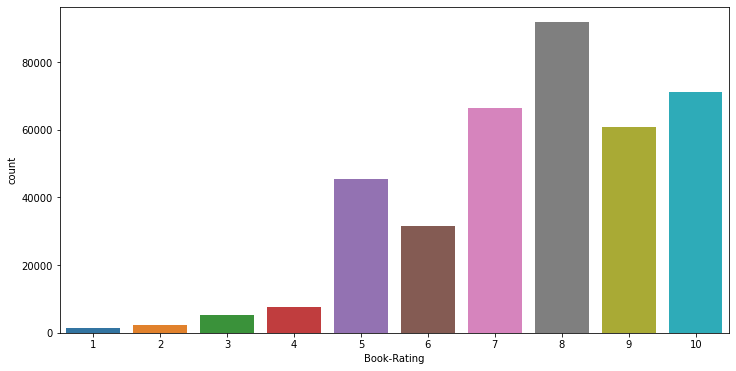

In [59]:
#visualize non_zero ratings
plt.figure(figsize=(12, 6))
sns.countplot(data=ratings_non_zero , x='Book-Rating')
plt.show()

8 is the highest frequncy of ratings

<font color= 'blue'>Let's find the top 5 books which are rated by most number of users.

In [60]:
#top 10 books which are rated by more numbers of users
rating_count = pd.DataFrame(ratings_non_zero.groupby('ISBN')['Book-Rating'].count())
rating_count.sort_values('Book-Rating', ascending=False).head(10)

,Book-Rating
ISBN,
0316666343,707
0971880107,581
0385504209,487
0312195516,383
0060928336,320
059035342X,313
0142001740,307
0446672211,295
044023722X,281


The book with ISBN '0316666343' received the most rating counts. Let’s find out what book it is, and what books are in the top 10

In [61]:
most_rated_books = pd.DataFrame(['0316666343', '0971880107', '0385504209', '0312195516', '0060928336','059035342X ','0142001740','0446672211','044023722X','0452282152'],
                                index=np.arange(10), columns = ['ISBN'])
most_rated_books_summary = pd.merge(most_rated_books, books_df, on='ISBN')
most_rated_books_summary

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,0316666343,The Lovely Bones: A Novel,Alice Sebold,2002.0,"Little, Brown"
1,0971880107,Wild Animus,Rich Shapero,2004.0,Too Far
2,0385504209,The Da Vinci Code,Dan Brown,2003.0,Doubleday
3,0312195516,The Red Tent (Bestselling Backlist),Anita Diamant,1998.0,Picador USA
4,0060928336,Divine Secrets of the Ya-Ya Sisterhood: A Novel,Rebecca Wells,1997.0,Perennial
5,0142001740,The Secret Life of Bees,Sue Monk Kidd,2003.0,Penguin Books
6,0446672211,Where the Heart Is (Oprah's Book Club (Paperba...,Billie Letts,1998.0,Warner Books
7,044023722X,A Painted House,John Grisham,2001.0,Dell Publishing Company
8,0452282152,Girl with a Pearl Earring,Tracy Chevalier,2001.0,Plume Books


The book that received the most rating counts in this data set is Alice Sebold’s “The Lovely Bones: A Novel”. 

In [62]:
#Create new column Avg_Rating 
ratings_non_zero['Avg_Rating']=ratings_non_zero.groupby('ISBN')['Book-Rating'].transform('mean')
#Create new column Total_No_Of_Users_Rated 
ratings_non_zero['Total_No_Of_Users_Rated']=ratings_non_zero.groupby('ISBN')['Book-Rating'].transform('count')

In [63]:
#data sample after created two column
ratings_non_zero.head()

,User-ID,ISBN,Book-Rating,Avg_Rating,Total_No_Of_Users_Rated
1,276726,0155061224,5,5.000000,1
3,276729,052165615X,3,3.000000,1
4,276729,0521795028,6,6.000000,1
8,276744,038550120X,7,7.580247,81
16,276747,0060517794,9,8.000000,30


#**Merging All Dataset**

In [64]:
#merging users_df,ratings_non_zero and books_df
books_dataset = users_df.copy()
books_dataset = pd.merge(books_dataset, ratings_non_zero, on='User-ID')
books_dataset = pd.merge(books_dataset, books_df, on='ISBN')

In [65]:
#shape of dataset
books_dataset.shape

(383842, 11)

In [66]:
#first 5 datapoints of merged dataset
books_dataset.head()

,User-ID,Age,Country,ISBN,Book-Rating,Avg_Rating,Total_No_Of_Users_Rated,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,8,33.0,canada,0002005018,5,7.666667,9,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada
1,11676,28.0,nan,0002005018,8,7.666667,9,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada
2,67544,30.0,canada,0002005018,8,7.666667,9,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada
3,116866,32.0,other,0002005018,9,7.666667,9,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada
4,123629,33.0,canada,0002005018,9,7.666667,9,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada


In [67]:
#checking missing value
check_missing_values(books_dataset)

,index,Missing Values,Missing Values %,Data_type
0,User-ID,0,0.0,int64
1,Age,0,0.0,float64
2,Country,0,0.0,object
3,ISBN,0,0.0,object
4,Book-Rating,0,0.0,int64
5,Avg_Rating,0,0.0,float64
6,Total_No_Of_Users_Rated,0,0.0,int64
7,Book-Title,0,0.0,object
8,Book-Author,0,0.0,object
9,Year-Of-Publication,0,0.0,float64


### **Correlation Matrix**

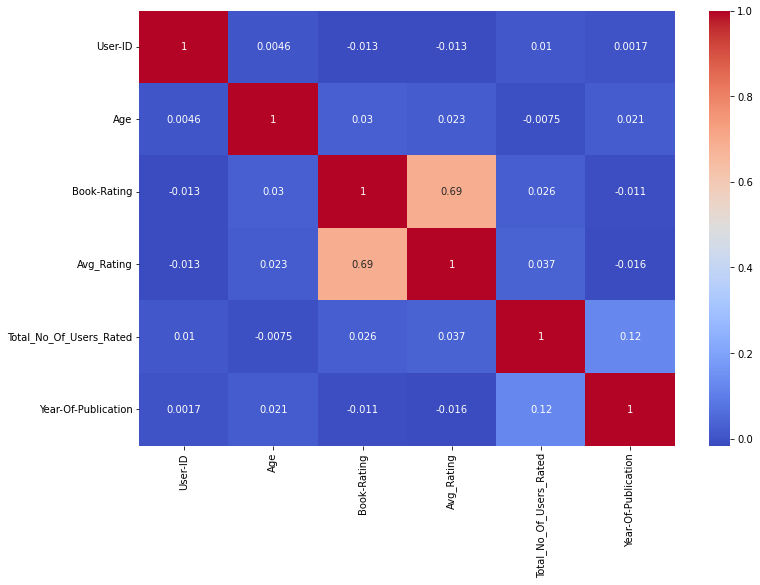

In [68]:
#correlation matrix of selected features.
plt.figure(figsize=(12,8))
sns.heatmap(books_dataset.corr(),annot=True, cmap='coolwarm')
plt.show()

#**Popularity Based Filtering**

As the name suggests Popularity based recommendation system works with the trend. It basically uses the items which are in trend right now. For example, if any book which is usually bought by every new user then there are chances that it may suggest that book to the user who just signed up.<br>
Book weighted avg formula:<br>
Weighted Rating(WR)=[vR/(v+m)]+[mC/(v+m)]<br>
where,<br>
v is the number of rating for the books;<br>
m is the minimum rating required to be listed in the chart;<br>
R is the average rating of the book; and<br>
C is the mean rating across the whole ratings.<br>

In [69]:
#finding the values of v,m,R,C
C= books_dataset['Avg_Rating'].mean()
m= books_dataset['Total_No_Of_Users_Rated'].quantile(0.90)
Top_Books = books_dataset.loc[books_dataset['Total_No_Of_Users_Rated'] >= m]
print(f'C={C} , m={m}')
Top_Books.shape

C=7.626700569504765 , m=64.0


(38570, 11)

Here we used 90th percentile as our cutoff. In other words, for a book to feature in the charts, it must have more rating than at least 90% of the books in the list.<br>
We see that there are 38570 books which qualify to be in this list. Now, we need to calculate our metric for each qualified book. To do this, we will define a function, weighted_rating() and define a new feature score, of which we’ll calculate the value by applying this function to our DataFrame of qualified books:


In [70]:
#function of calculating weighted_rating
def weighted_rating(x, m=m, C=C):
    v = x['Total_No_Of_Users_Rated']
    R = x['Avg_Rating']
    return (v/(v+m) * R) + (m/(m+v) * C)
    
 
Top_Books['Score'] = Top_Books.apply(weighted_rating,axis=1)
 
 
#Sorting books based on score calculated above
Top_Books = Top_Books.sort_values('Score', ascending=False)

In [71]:
#Keeping only one entry of each book
Top_Books=Top_Books.sort_values('Score', ascending=False).drop_duplicates('ISBN').sort_index()
cm=sns.light_palette('yellow',as_cmap=True)
#Sorting books based on score calculated above
Top_Books = Top_Books.sort_values('Score', ascending=False)

#Printing the top 20 books
Top_Books[['Book-Title', 'Total_No_Of_Users_Rated', 'Avg_Rating', 'Score']].reset_index(drop=True).head(20).style.background_gradient(cmap=cm)

,Book-Title,Total_No_Of_Users_Rated,Avg_Rating,Score
0,Harry Potter and the Goblet of Fire (Book 4),137,9.262774,8.741835
1,Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback)),313,8.939297,8.716469
2,Harry Potter and the Order of the Phoenix (Book 5),206,9.033981,8.700403
3,To Kill a Mockingbird,214,8.943925,8.640679
4,Harry Potter and the Prisoner of Azkaban (Book 3),133,9.082707,8.609690
5,"The Return of the King (The Lord of the Rings, Part 3)",77,9.402597,8.596517
6,Harry Potter and the Prisoner of Azkaban (Book 3),141,9.035461,8.595653
7,Harry Potter and the Sorcerer's Stone (Book 1),119,8.983193,8.508791
8,Harry Potter and the Chamber of Secrets (Book 2),189,8.783069,8.490549
9,Harry Potter and the Chamber of Secrets (Book 2),126,8.920635,8.484783


The Popularity based recommender provide a general chart of recommended books to all the users. They are not sensitive to the interests and tastes of a particular user.

# **Model Based Collaborative Filtering Recommender**
The goal of the recommender system is to predict user preference for a set of items based on the past experience. Two the most popular approaches are Content-Based and Collaborative Filtering.
<br>Collaborative filtering is a technique used by websites like Amazon, YouTube, and Netflix. It filters out items that a user might like on the basis of reactions of similar users. There are two categories of collaborative filtering algorithms: memory based and model based.
<br>
Model based approach involves building machine learning algorithms to predict user's ratings. They involve dimensionality reduction methods that reduce high dimensional matrix containing abundant number of missing values with a much smaller matrix in lower-dimensional space.
<br>
The goal of this section is to compare SVD and NMF algorithms, try different configurations of parameters and explore obtained results.

In [72]:
import scipy
import math
import sklearn
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse.linalg import svds
import matplotlib.pyplot as plt

This analysis will focus on book recommendations based on Book-Crossing dataset. To reduce the dimensionality of the dataset and avoid running into memory error we will focus on users with at least 3 ratings and top 10% most frequently rated books. 
<br>
The recommender systems will be built using surprise package (Matrix Factorization - based models).

In [73]:
#renaming the column name
ratings_non_zero.rename(columns = {'User-ID':'user_id' ,'ISBN':'isbn' ,'Book-Rating':'book_rating'},inplace=True)

In [74]:
#extracting more than 2 ratings in which book
user_ratings_threshold = 3

filter_users = ratings_non_zero['user_id'].value_counts()
filter_users_list = filter_users[filter_users >= user_ratings_threshold].index.to_list()

df_ratings_top = ratings_non_zero[ratings_non_zero['user_id'].isin(filter_users_list)]

print('Filter: users with at least %d ratings\nNumber of records: %d' % (user_ratings_threshold, len(df_ratings_top)))

Filter: users with at least 3 ratings
Number of records: 327271


In [75]:
# top 10% most frequently rated books
book_ratings_threshold_perc = 0.1
book_ratings_threshold = len(df_ratings_top['isbn'].unique()) * book_ratings_threshold_perc

filter_books_list = df_ratings_top['isbn'].value_counts().head(int(book_ratings_threshold)).index.to_list()
df_ratings_top = df_ratings_top[df_ratings_top['isbn'].isin(filter_books_list)]

print('Filter: top %d%% most frequently rated books\nNumber of records: %d' % (book_ratings_threshold_perc*100, len(df_ratings_top)))

Filter: top 10% most frequently rated books
Number of records: 160787


SVD and NMF models comparison<br>
Singular Value Decomposition (SVD) and Non-negative Matrix Factorization (NMF) are matrix factorization techniques used for dimensionality reduction. Surprise package provides implementation of those algorithms.


In [77]:
pip install surprise

     |████████████████████████████████| 11.8 MB 5.0 MB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp37-cp37m-linux_x86_64.whl size=1619426 sha256=f606f070462460170aa9d09c5b83393e7c64637388d8ab75c24c6a6f047e1a9f
  Stored in directory: /root/.cache/pip/wheels/76/44/74/b498c42be47b2406bd27994e16c5188e337c657025ab400c1c
Successfully built scikit-surprise


In [78]:
# importing surprise package
from surprise import Dataset, Reader
from surprise import SVD, NMF
from surprise.model_selection import cross_validate, train_test_split, GridSearchCV

In [79]:
#top 10% most frequently rated books with selected feature
df=df_ratings_top.copy()
reader = Reader(rating_scale=(1, 10))
data = Dataset.load_from_df(df[['user_id', 'isbn', 'book_rating']], reader)

In [80]:
#SVD model accuracy
model_svd = SVD()
cv_results_svd = cross_validate(model_svd, data, cv=3)
pd.DataFrame(cv_results_svd).mean()

test_rmse    1.602671
test_mae     1.240250
fit_time     7.091781
test_time    0.670742
dtype: float64

In [81]:
#NMF model accuracy
model_nmf = NMF()
cv_results_nmf = cross_validate(model_nmf, data, cv=3)
pd.DataFrame(cv_results_nmf).mean()

test_rmse     2.622645
test_mae      2.240956
fit_time     11.538491
test_time     0.567849
dtype: float64

It's clear that for the given dataset much better results can be obtained with SVD approach - both in terms of accuracy and training / testing time.

## **Hyper parameter tunning**

##**Optimisation of SVD algorithm**<br>
Grid Search Cross Validation computes accuracy metrics for an algorithm on various combinations of parameters, over a cross-validation procedure. It's useful for finding the best configuration of parameters.
<br>
It is used to find the best setting of parameters:
<br>
n_factors - the number of factors<br>
n_epochs - the number of iteration of the SGD procedure<br>
lr_all - the learning rate for all parameters<br>
reg_all - the regularization term for all parameters<br>
As a result, regarding the majority of parameters, the default setting is the most optimal one. The improvement obtained with Grid Search is very small.

In [82]:
#Hyperparameter tuning
param_grid = {'n_factors': [80,100],
              'n_epochs': [5, 20],
              'lr_all': [0.002, 0.005],
              'reg_all': [0.2, 0.4]}

gs = GridSearchCV(SVD, param_grid, measures=['rmse', 'mae'], cv=3)
gs.fit(data)

print(gs.best_score['rmse'])
print(gs.best_params['rmse'])

1.5938486245022891
{'n_factors': 80, 'n_epochs': 20, 'lr_all': 0.005, 'reg_all': 0.2}


## **Analysis of Collaborative Filtering model results**
In this part, let's examine in detail the results obtained by the SVD model that provided the best RMSE score.

In [83]:
#splitting dataset(top 10% most frequently rated books with selected feature) into training and testing dataset
trainset, testset = train_test_split(data, test_size=0.2)

model = SVD(n_factors=80, n_epochs=20, lr_all=0.005, reg_all=0.2)
model.fit(trainset)
predictions = model.test(testset)

In [84]:
#predicting ratings for books
df_pred = pd.DataFrame(predictions, columns=['user_id', 'isbn', 'actual_rating', 'pred_rating', 'details'])
df_pred['impossible'] = df_pred['details'].apply(lambda x: x['was_impossible'])
df_pred['pred_rating_round'] = df_pred['pred_rating'].round()
df_pred['abs_err'] = abs(df_pred['pred_rating'] - df_pred['actual_rating'])
df_pred.drop(['details'], axis=1, inplace=True)
df_pred.sample(5)

,user_id,isbn,actual_rating,pred_rating,impossible,pred_rating_round,abs_err
25166,28204,0552996009,9.0,7.585262,False,8.0,1.414738
3168,81216,0446603589,8.0,7.252649,False,7.0,0.747351
25765,277195,1573221856,10.0,8.201563,False,8.0,1.798437
12206,110786,0399133844,10.0,7.916827,False,8.0,2.083173
28457,277562,0140043519,9.0,7.775006,False,8.0,1.224994


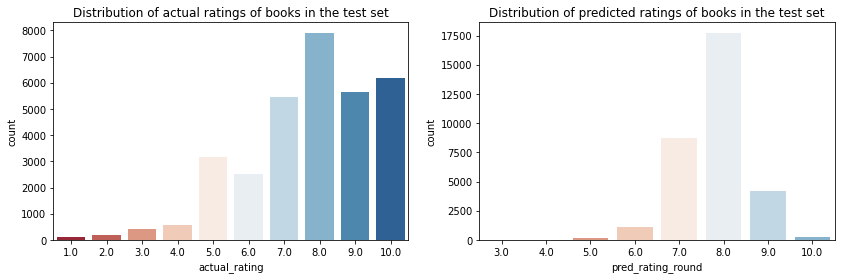

In [85]:
#visualize actual ratings and predicted ratings
palette = sns.color_palette("RdBu", 10)
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 4))

sns.countplot(x='actual_rating', data=df_pred, palette=palette, ax=ax1)
ax1.set_title('Distribution of actual ratings of books in the test set')

sns.countplot(x='pred_rating_round', data=df_pred, palette=palette, ax=ax2)
ax2.set_title('Distribution of predicted ratings of books in the test set')

plt.show()

Distribution of actual and predicted ratings in the test set
According to the distribution of actual ratings of books in the test set, the biggest part of users give positive scores - between 7 and 10. The mode equals 8 but count of ratings 7, 9, 10 is also noticeable. The distribution of predicted ratings in the test set is visibly different. One more time, 8 is a mode but scores 7, 9 and 10 are clearly less frequent.
<br>
It shows that the recommender system is not perfect and it cannot reflect the real distribution of book ratings.

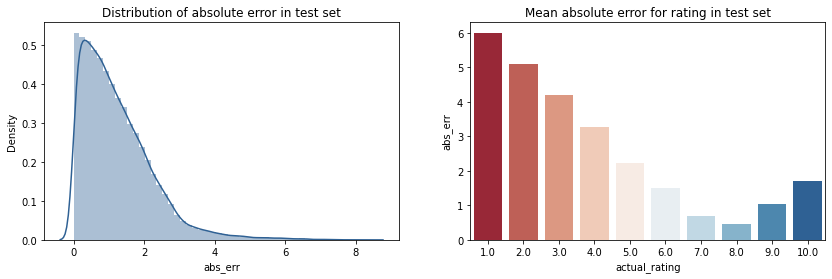

In [86]:
#Visualize actual_rating vs abs_err
df_pred_err = df_pred.groupby('actual_rating')['abs_err'].mean().reset_index()

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 4))

sns.distplot(df_pred['abs_err'], color='#2f6194', ax=ax1)
ax1.set_title('Distribution of absolute error in test set')

sns.barplot(x='actual_rating', y='abs_err', data=df_pred_err, palette=palette, ax=ax2)
ax2.set_title('Mean absolute error for rating in test set')

plt.show()

**Absolute error of predicted ratings**<br>
The distribution of absolute errors is right-skewed, showing that the majority of errors is small: between 0 and 1. There is a long tail that indicates that there are several observations for which the absolute error was close to 10.
<br>
How good/bad the model is with predicting certain scores? As expected from the above charts, the model deals very well with predicting score = 8 (the most frequent value). The further the rating from score = 8, the higher the absolute error. The biggest errors happen to observations with scores 1 or 2 which indicates that probably the model is predicting high ratings for those observations.

In [87]:
#merging actual and predicted dataset
df_books = books_df.copy()
df_books.rename(columns = {'ISBN':'isbn' ,'Book-Title':'book_title'},inplace=True)
df_ext = df.merge(df_books[['isbn', 'book_title']], on='isbn', how='left')
df_ext = df_ext.merge(df_pred[['isbn', 'user_id', 'pred_rating']], on=['isbn', 'user_id'], how='left')

###Train set: Top rated books

In [88]:
#193458 user id with predictedt rating is NaN
selected_user_id = 193458
df_user = df_ext[df_ext['user_id']==selected_user_id]

df_user[(df_user['pred_rating'].isna())&(df_user['book_rating']>=9)].sample(10)

,user_id,isbn,book_rating,Avg_Rating,Total_No_Of_Users_Rated,book_title,pred_rating
113570,193458,0679429220,9,7.794393,107,Midnight in the Garden of Good and Evil: A Sav...,NaN
113528,193458,0064471063,9,8.518519,27,The Horse and His Boy,NaN
113569,193458,0671880314,9,8.305556,36,Schindler's List,NaN
113536,193458,0140620125,9,8.133333,15,Wuthering Heights (Penguin Popular Classics),NaN
113578,193458,1853260002,10,8.217391,23,Pride &amp; Prejudice (Wordsworth Classics),NaN
113538,193458,0142001740,9,8.452769,307,The Secret Life of Bees,NaN
113529,193458,0064471071,9,8.733333,15,The Voyage of the Dawn Treader (rack) (Narnia),NaN
113566,193458,0553258001,9,8.236842,38,The Cider House Rules,NaN
113543,193458,0330352695,9,7.615385,13,Four Letters of Love,NaN
113527,193458,0064471055,9,8.545455,22,Prince Caspian (rack) : The Return to Narnia (...,NaN



###Test set: predicted top rated books

In [89]:
#193458 user id with predicted top rated books
df_user[df_user['pred_rating'].notna()].sort_values('pred_rating', ascending=False).head()

,user_id,isbn,book_rating,Avg_Rating,Total_No_Of_Users_Rated,book_title,pred_rating
113526,193458,0064471047,9,8.714286,42,"The Lion, the Witch, and the Wardrobe (The Chr...",8.643094
113545,193458,0345361792,10,8.607735,181,A Prayer for Owen Meany,8.410950
113531,193458,0064471098,9,8.733333,15,The Silver Chair,8.183504
113550,193458,0345431057,9,9.125000,8,Slaves in the Family (Ballantine Reader's Circle),8.058689
113558,193458,0449214206,8,8.333333,6,Covenant,7.982932


###Test set: actual top rated books

In [90]:
#193458 user id with actual top rated books
df_user[df_user['pred_rating'].notna()].sort_values('book_rating', ascending=False).head()

,user_id,isbn,book_rating,Avg_Rating,Total_No_Of_Users_Rated,book_title,pred_rating
113545,193458,0345361792,10,8.607735,181,A Prayer for Owen Meany,8.410950
113526,193458,0064471047,9,8.714286,42,"The Lion, the Witch, and the Wardrobe (The Chr...",8.643094
113531,193458,0064471098,9,8.733333,15,The Silver Chair,8.183504
113533,193458,014011369X,9,9.125000,8,"And the Band Played on: Politics, People, and ...",7.941359
113544,193458,0345342569,9,7.947368,19,Shoeless Joe,7.920483
